In [14]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# only keep results
df_input = pd.read_csv('results/aggregate_results_imputed.csv')
# df_input = pd.read_csv('imputation/aggregate_results_imputed.csv')
discount = 0
scenario = 'val'

df = df_input[(df_input['discount']==discount)&
        (df_input['ConsiderTC']==1)&
        (df_input['ConsiderMB']==1)&
        (df_input['scenario']==scenario)]
df = df.reset_index().drop(columns=['index'])
df = df[df['tax'] > 0]

df2 = df_input[(df_input['discount']==discount)&
        (df_input['ConsiderTC']==0)&
        (df_input['ConsiderMB']==1)&
        (df_input['scenario']==scenario)]
df2 = df2.reset_index().drop(columns=['index'])
df2 = df2[df2['tax'] > 0]

df = df.groupby('Country Code').sum().reset_index()
df2 = df2.groupby('Country Code').sum().reset_index()

countries_info = pd.read_csv('data/dl1_countrycodeorg_country_name.csv')
countries_info = countries_info[['Country Code', 'Region', 'Income group']]
codemap = countries_info.dropna()
df = df.merge(codemap, on='Country Code')
df2 = df2.merge(codemap, on='Country Code')

print(df.head())
print(len(df))

  Country Code  Unnamed: 0  ConsiderTC  ConsiderMB     GDPloss       tax  \
0          AFG           0          29          29   14.538792  0.003444   
1          AGO     1848982          29          29   25.241803  0.002470   
2          ALB          29          29          29   10.953165  0.005584   
3          AND          58          29          29    1.269854  0.007633   
4          ARE          87          29          29  102.955261  0.003643   

        pc_loss  discount                      Region         Income group  
0    277.916725       0.0                  South Asia           Low income  
1    481.443618       0.0          Sub-Saharan Africa  Lower middle income  
2   4065.178856       0.0       Europe & Central Asia  Upper middle income  
3  16361.371634       0.0       Europe & Central Asia          High income  
4   9801.589278       0.0  Middle East & North Africa          High income  
199


In [16]:
df2

,Country Code,Unnamed: 0,ConsiderTC,ConsiderMB,GDPloss,tax,pc_loss,discount,Region,Income group
0,AFG,0,0,29,13.115439,0.003107,250.708582,0.0,South Asia,Low income
1,AGO,774184,0,29,24.791530,0.002426,472.855438,0.0,Sub-Saharan Africa,Lower middle income
2,ALB,29,0,29,8.984328,0.004580,3334.460689,0.0,Europe & Central Asia,Upper middle income
3,AND,58,0,29,0.904349,0.005436,11652.041335,0.0,Europe & Central Asia,High income
4,ARE,87,0,29,83.388541,0.002951,7938.790288,0.0,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,1769,0,29,0.149636,0.003152,643.996948,0.0,East Asia & Pacific,Lower middle income
195,YEM,1798,0,29,8.295851,0.002253,210.657038,0.0,Middle East & North Africa,Low income
196,ZAF,778215,0,29,65.267061,0.002688,959.497673,0.0,Sub-Saharan Africa,Upper middle income
197,ZMB,778244,0,29,7.295736,0.003274,262.769777,0.0,Sub-Saharan Africa,Lower middle income


In [17]:
data = df[['GDPloss','Country Code']].merge(df2[['GDPloss','Country Code']],on='Country Code')

In [18]:
data['TC'] = 1-data['GDPloss_y']/data['GDPloss_x']

In [19]:
data

,GDPloss_x,Country Code,GDPloss_y,TC
0,14.538792,AFG,13.115439,0.097900
1,25.241803,AGO,24.791530,0.017838
2,10.953165,ALB,8.984328,0.179751
3,1.269854,AND,0.904349,0.287832
4,102.955261,ARE,83.388541,0.190051
...,...,...,...,...
194,0.163508,WSM,0.149636,0.084839
195,9.474230,YEM,8.295851,0.124377
196,76.711390,ZAF,65.267061,0.149187
197,7.409399,ZMB,7.295736,0.015340


In [20]:
data[data['Country Code']=='CHN']

,GDPloss_x,Country Code,GDPloss_y,TC
34,9473.915798,CHN,8155.163613,0.139198


In [21]:
data[data['Country Code']=='USA']

,GDPloss_x,Country Code,GDPloss_y,TC
188,7456.944591,USA,5397.912634,0.276123


In [22]:
data.sort_values('TC', ascending=False)

,GDPloss_x,Country Code,GDPloss_y,TC
133,96.869076,NOR,49.375469,0.490287
18,5.648704,BHR,3.115539,0.448451
156,103.017548,SGP,57.238356,0.444382
10,99.870976,AUT,55.751046,0.441769
97,810.868384,KOR,455.586975,0.438149
...,...,...,...,...
197,7.409399,ZMB,7.295736,0.015340
38,2.005341,COG,1.975540,0.014861
138,334.879426,PAK,330.250217,0.013824
26,1.331574,BRB,1.313878,0.013290


In [23]:
ratio = (1-df2.groupby('Income group').sum()['GDPloss']/df.groupby('Income group').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Income group,TC
0,Low income,6.028474
1,Lower middle income,7.097120
2,Upper middle income,13.965531
3,High income,28.330129


In [24]:
df2

,Country Code,Unnamed: 0,ConsiderTC,ConsiderMB,GDPloss,tax,pc_loss,discount,Region,Income group
0,AFG,0,0,29,13.115439,0.003107,250.708582,0.0,South Asia,Low income
1,AGO,774184,0,29,24.791530,0.002426,472.855438,0.0,Sub-Saharan Africa,Lower middle income
2,ALB,29,0,29,8.984328,0.004580,3334.460689,0.0,Europe & Central Asia,Upper middle income
3,AND,58,0,29,0.904349,0.005436,11652.041335,0.0,Europe & Central Asia,High income
4,ARE,87,0,29,83.388541,0.002951,7938.790288,0.0,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,1769,0,29,0.149636,0.003152,643.996948,0.0,East Asia & Pacific,Lower middle income
195,YEM,1798,0,29,8.295851,0.002253,210.657038,0.0,Middle East & North Africa,Low income
196,ZAF,778215,0,29,65.267061,0.002688,959.497673,0.0,Sub-Saharan Africa,Upper middle income
197,ZMB,778244,0,29,7.295736,0.003274,262.769777,0.0,Sub-Saharan Africa,Lower middle income


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


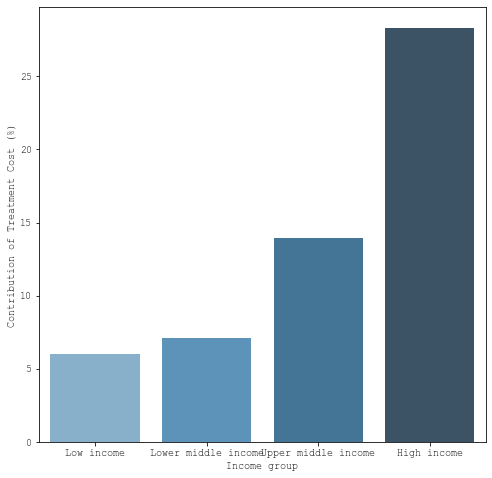

In [25]:
plt.rcParams['font.family']='Courier New, monospace'
fig, ax = plt.subplots(figsize=(8,8))  # create figure & 1 axis
ax = sns.barplot("Income group", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.savefig('tables/figure_S4.pdf')

In [26]:
ratio = (1 - df2.groupby('Region').sum()['GDPloss']/df.groupby('Region').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Region,TC
0,South Asia,4.215838
1,Sub-Saharan Africa,6.974162
2,Latin America & Caribbean,15.068470
3,East Asia & Pacific,18.155129
4,Europe & Central Asia,21.329127
5,Middle East & North Africa,22.916680
6,North America,27.608489


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


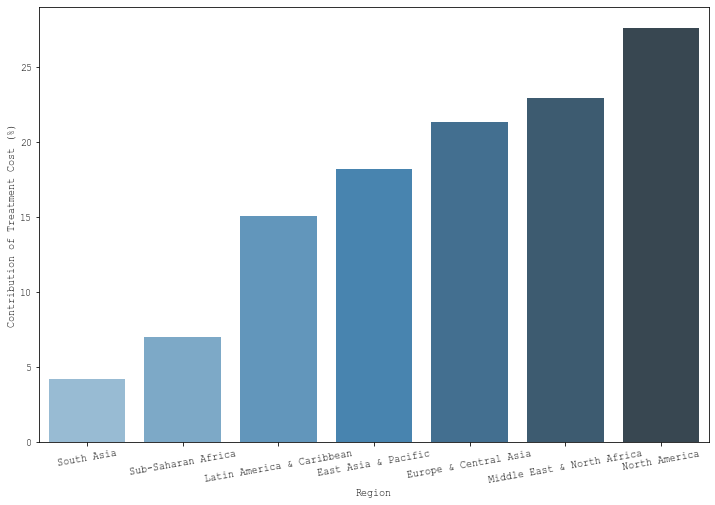

In [30]:
fig, ax = plt.subplots(figsize=(12,8))  # create figure & 1 axis
ax = sns.barplot("Region", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.xticks(rotation=10)
plt.savefig('tables/figure_S5.pdf')